In [45]:
library(dplyr)
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# 7. 데이터 정제

## 7-1. 빠진 데이터, 이상한 데이터 제거하기

In [1]:
df <- data.frame(sex = c("M", "F", NA, "M", "F"),
                score = c(5, 4, 3, 4, NA))
df

sex,score
M,5
F,4
NA,3
M,4
F,NA


In [2]:
is.na(df) #결측치 확인

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [3]:
table(is.na(df)) #결측치 빈도 출력


FALSE  TRUE 
    8     2 

In [5]:
table(is.na(df$sex)) #column별 NA 빈도 출력


FALSE  TRUE 
    4     1 

In [8]:
mean(df$score) #socre column에 NA값이 있기 때문에 평균값을 구할 수 없음

[1] NA

In [10]:
df %>% filter(is.na(score))

sex,score
F,NA


In [12]:
df %>% filter(!is.na(score)) #socre의 NA값을 뺀 값만 출력

sex,score
M,5
F,4
NA,3
M,4


In [20]:
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex)) #socre, sex의 NA 값 제거한 데이터 프레임 생성
df_nomiss

sex,score
M,5
F,4
M,4


In [21]:
mean(df_nomiss$score)

[1] 4.333333

In [22]:
df_nomiss2 <- na.omit(df) #NA값 있는 모든 row 날려버리기
df_nomiss2

,sex,score
1,M,5
2,F,4
4,M,4


In [27]:
mean(df$score, na.rm = T) #결측치 제외하고 평균 산출(NA Remove = True)

[1] 4

In [29]:
sum(df$score, na.rm = T) #결측치 제외하고 합계 산출

[1] 16

In [37]:
exam <- read.csv("C:/Users/admin/Desktop/Big_data/R/Doit_R_Data/csv_exam.csv")

In [47]:
exam[c(3, 8, 15), "math"] <- NA #e, 8, 15행 math값 NA로 수정
exam %>% head(5)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,NA,86,78
4,1,30,98,58
5,2,25,80,65


In [41]:
exam %>% summarise(mean_math=mean(math, na.rm=T))

mean_math
55.23529


In [54]:
exam$math <- ifelse(is.na(exam$math), mean(math, na.rm=T), exam$math) #값이 NA면 평균값, 아니면 그 값 그대로
table(is.na(exam$math))


FALSE 
   20 

In [55]:
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,55,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,55,78,25
9,3,20,98,15
10,3,50,98,45


In [57]:
exam[c(2, 7, 10), "english"] <- NA
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,NA,60
3,1,55,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,NA,45
8,2,55,78,25
9,3,20,98,15
10,3,50,NA,45


In [60]:
exam$english <- ifelse(is.na(exam$english), mean(exam$english, na.rm = T), exam$english)
exam

id,class,math,english,science
1,1,50,98.00000,50
2,1,60,83.11765,60
3,1,55,86.00000,78
4,1,30,98.00000,58
5,2,25,80.00000,65
6,2,50,89.00000,98
7,2,80,83.11765,45
8,2,55,78.00000,25
9,3,20,98.00000,15
10,3,50,83.11765,45


In [65]:
options(digits=2) #소수점 표기 방법(n=데이터 총 자릿수)
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,83,60
3,1,55,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,83,45
8,2,55,78,25
9,3,20,98,15
10,3,50,83,45


In [68]:
exam <- exam %>% mutate(total = 1.123456789)
exam

id,class,math,english,science,total
1,1,50,98,50,1.1
2,1,60,83,60,1.1
3,1,55,86,78,1.1
4,1,30,98,58,1.1
5,2,25,80,65,1.1
6,2,50,89,98,1.1
7,2,80,83,45,1.1
8,2,55,78,25,1.1
9,3,20,98,15,1.1
10,3,50,83,45,1.1


In [90]:
#혼자서 해보기 p.170
mpg <- as.data.frame(ggplot2::mpg)
mpg[c(65, 124, 131, 153, 121), "hwy"] <- NA
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [78]:
table(is.na(mpg$hwy))


FALSE  TRUE 
  229     5 

In [79]:
table(is.na(mpg$drv))


FALSE 
  234 

In [91]:
#case 1:
mpg$hwy <- ifelse(is.na(mpg$hwy), mean(mpg$hwy, na.rm = T), mpg$hwy)
mpg %>% group_by(drv) %>% summarise(mean_drv = mean(hwy))

`summarise()` ungrouping output (override with `.groups` argument)


drv,mean_drv
4,19
f,28
r,21


In [94]:
#case 2:
mpg %>%
    filter(!is.na(hwy)) %>%
    group_by(drv) %>%
    summarise(mean_hwy=mean(hwy))

`summarise()` ungrouping output (override with `.groups` argument)


drv,mean_hwy
4,19
f,28
r,21


## 7-2. 이상치 제거하기

In [119]:
#sex는 1, 2 / score는 5점 척도로 가정. 
#즉, sex =1, 2 이외의 것은 이상치, 1 <= score <= 5 이외 것은 이상치
outlier <- data.frame(sex = c(1, 2, 1, 3, 2, 1),
                     score = c(5, 4, 3, 4, 2, 6))
outlier

sex,score
1,5
2,4
1,3
3,4
2,2
1,6


In [120]:
table(outlier$sex)


1 2 3 
3 2 1 

In [121]:
table(outlier$score)


2 3 4 5 6 
1 1 2 1 1 

In [122]:
outlier$sex <- ifelse(outlier$sex == 1 | outlier$sex == 2, outlier$sex, NA)
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,6


In [123]:
outlier$score <- ifelse(1 <= outlier$score & outlier$score <= 5, outlier$score, NA)
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,NA


In [125]:
outlier %>%
    filter(!is.na(sex) & !is.na(score)) %>%
    group_by(sex) %>%
    summarise(mean_score = mean(score))

`summarise()` ungrouping output (override with `.groups` argument)


sex,mean_score
1,4
2,3


In [126]:
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,NA


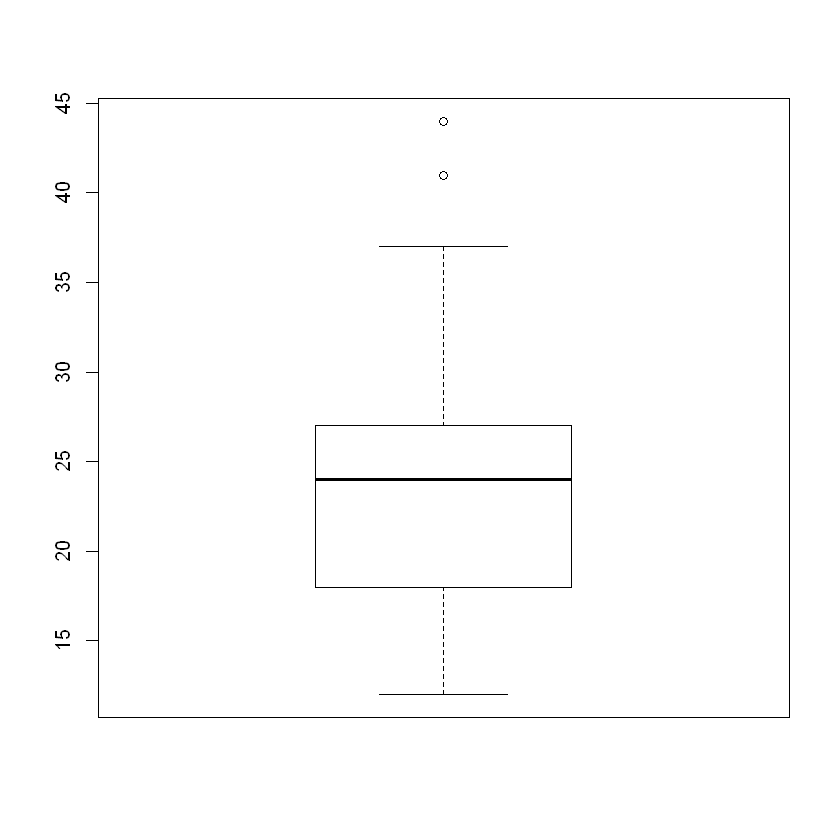

In [127]:
boxplot(mpg$hwy) #이상치 2개 확인할 수 있음

12
18
24
27
37


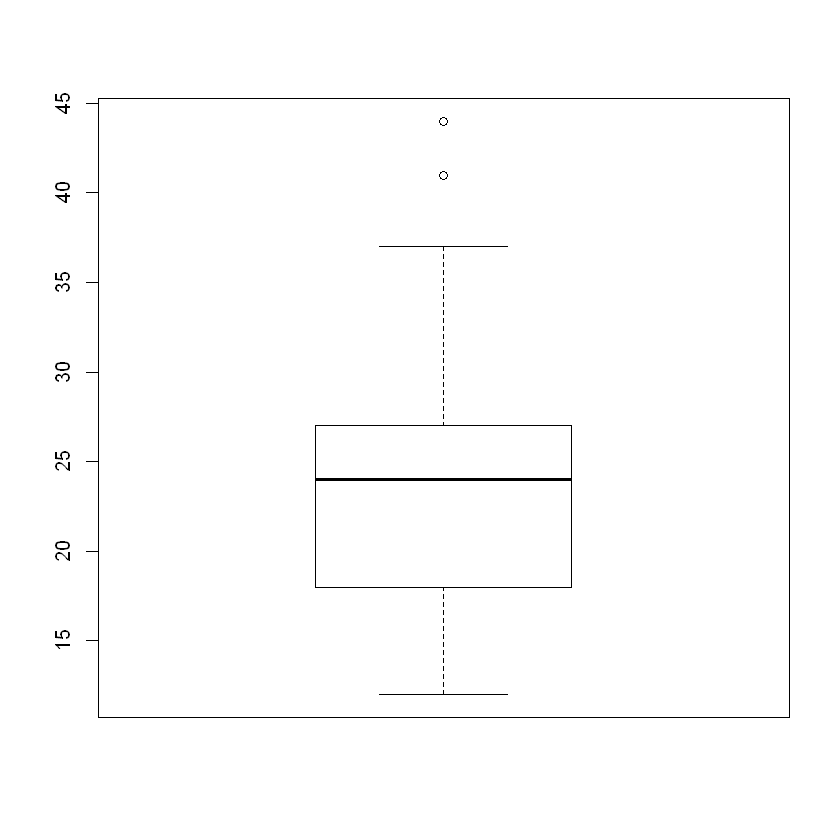

In [128]:
boxplot(mpg$hwy)$stats

In [130]:
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy> 37, NA, mpg$hwy)
table(is.na(mpg$hwy)) #결측치 3개 확인


FALSE  TRUE 
  231     3 

In [134]:
mpg %>%
    group_by(drv) %>%
    summarise(mean_hwy = mean(hwy, na.rm=T))

`summarise()` ungrouping output (override with `.groups` argument)


drv,mean_hwy
4,19
f,28
r,21


혼자서 해보기(p.178)

In [148]:
mpg <- as.data.frame(ggplot2::mpg)
mpg[c(10, 14, 58, 93), "drv"] <-  "k" #이상치 'k' 생성
mpg[c(29,43,129,203), "cty"] <- c(3, 4, 39, 42) #이상치 4개 생성

In [149]:
table(mpg$drv)
table(mpg$cty)


  4   f   k   r 
100 106   4  24 


 3  4  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 28 29 33 35 39 42 
 1  1  5 20  8 20 18 24 19 14 26 20 11 23  4  3  5  2  3  2  1  1  1  1  1 

In [146]:
#case 1:
#mpg$drv <- ifelse(mpg$drv == "k", NA, mpg$drv)

In [150]:
#case 2: %in% 사용
mpg$drv <- ifelse(mpg$drv %in% c("4", "f", "r"),mpg$drv, NA)

In [152]:
table(mpg$drv)


  4   f   r 
100 106  24 

9
14
17
19
26


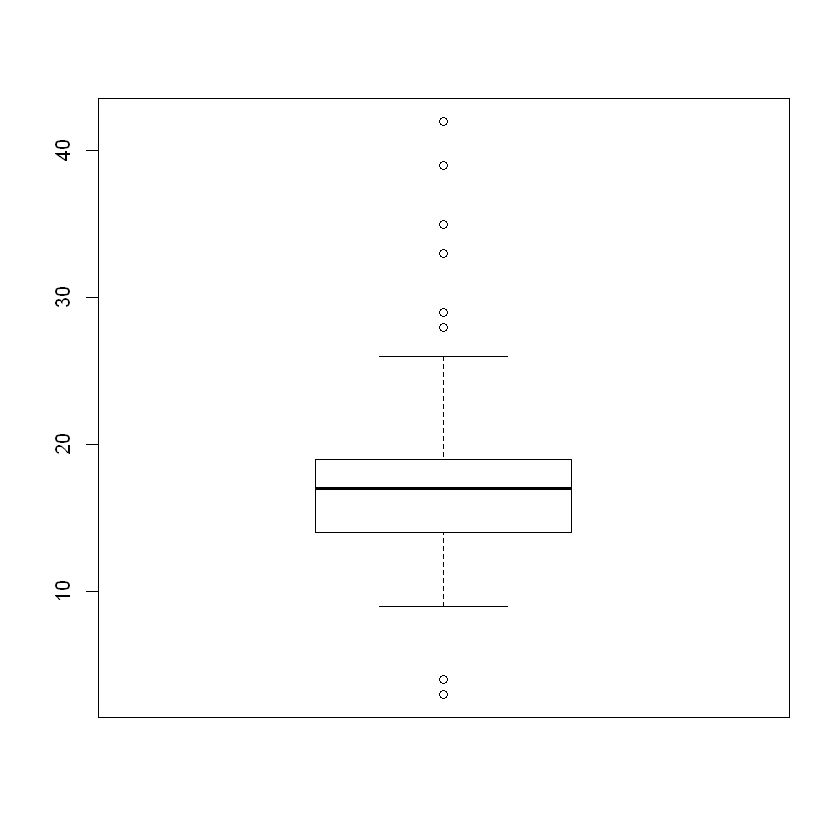

In [155]:
boxplot(mpg$cty)$stats

In [159]:
mpg$cty <- ifelse(mpg$cty <= 9 | mpg$cty >26, NA, mpg$cty)
table(mpg$cty)


11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
20  8 20 18 24 19 14 26 20 11 23  4  3  5  2  3 

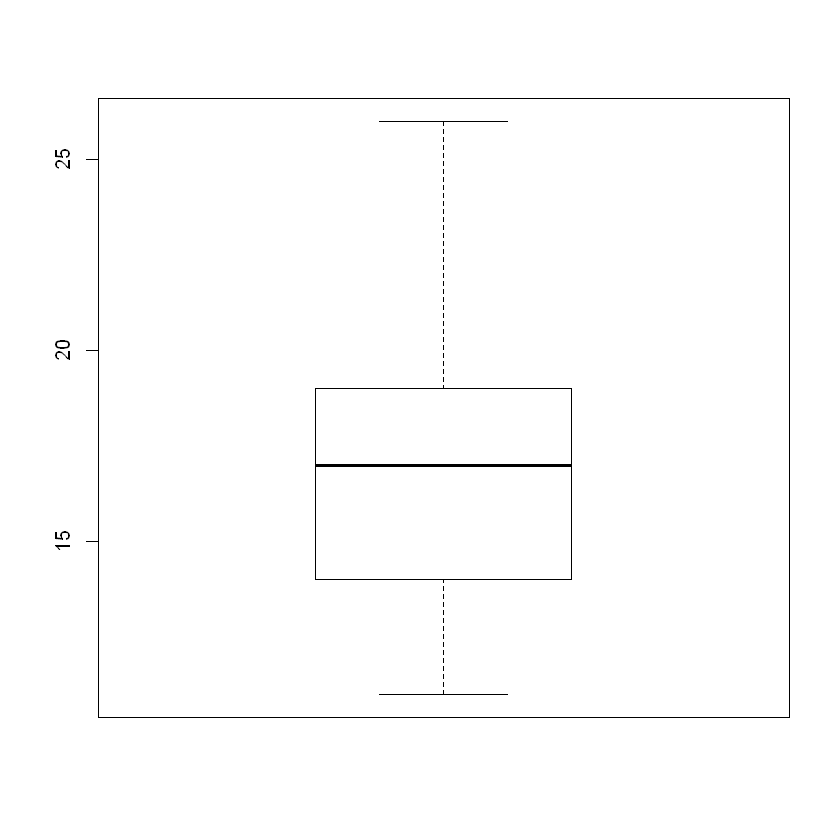

In [160]:
boxplot(mpg$cty)

In [166]:
mpg %>%
    filter(!is.na(drv) & !is.na(cty)) %>%
    group_by(drv) %>%
    summarise(mean_cty = mean(cty))    

`summarise()` ungrouping output (override with `.groups` argument)


drv,mean_cty
4,15
f,19
r,14


# <myhuman_outlier.csv 문제>

## 1. myhuman_outlier 불러와서 테이터프레임에 할당하기

In [173]:
install.packages('readxl')
library(readxl)

also installing the dependencies 'rematch', 'hms', 'cellranger', 'progress'



package 'rematch' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpuGXFo8\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"

In [208]:
human <- read.csv("C:/Users/admin/Desktop/Big_data/R/Rcode/excel/myhuman_outlier.csv")

In [209]:
human

Sociability,Rating,Career,Score,Group
23,2.28,3,57,NA
48,3.40,7,93,Good
57,2.28,8,76,Good
40,3.86,7,88,Good
45,3.16,6,82,Good
42,3.45,5,85,Good
58,3.47,6,86,Good
47,2.45,3,74,NA
32,2.47,7,64,Good
36,2.11,33,72,Good


## 2. 결측치 확인하기

In [210]:
table(is.na(human$Rating))


FALSE  TRUE 
   67     3 

In [204]:
human %>% summarise(mean_Rating = mean(Rating, na.rm = T))

mean_Rating
3


## 3. 결측치 자리에 평균값 넣기

In [217]:
human$Rating <- ifelse(!is.na(human$Rating), human$Rating, mean(human$Rating, na.rm = T))
table(is.na(human$Rating))
options(digits=3)
human


FALSE 
   70 

Sociability,Rating,Career,Score,Group
23,2.28,3,57,NA
48,3.40,7,93,Good
57,2.28,8,76,Good
40,3.86,7,88,Good
45,3.16,6,82,Good
42,3.45,5,85,Good
58,3.47,6,86,Good
47,2.45,3,74,NA
32,2.47,7,64,Good
36,2.11,33,72,Good


[,1]
[1,]    3
[2,]    5
[3,]    7
[4,]    7
[5,]   10
attr(,"class")
        1 
"integer"

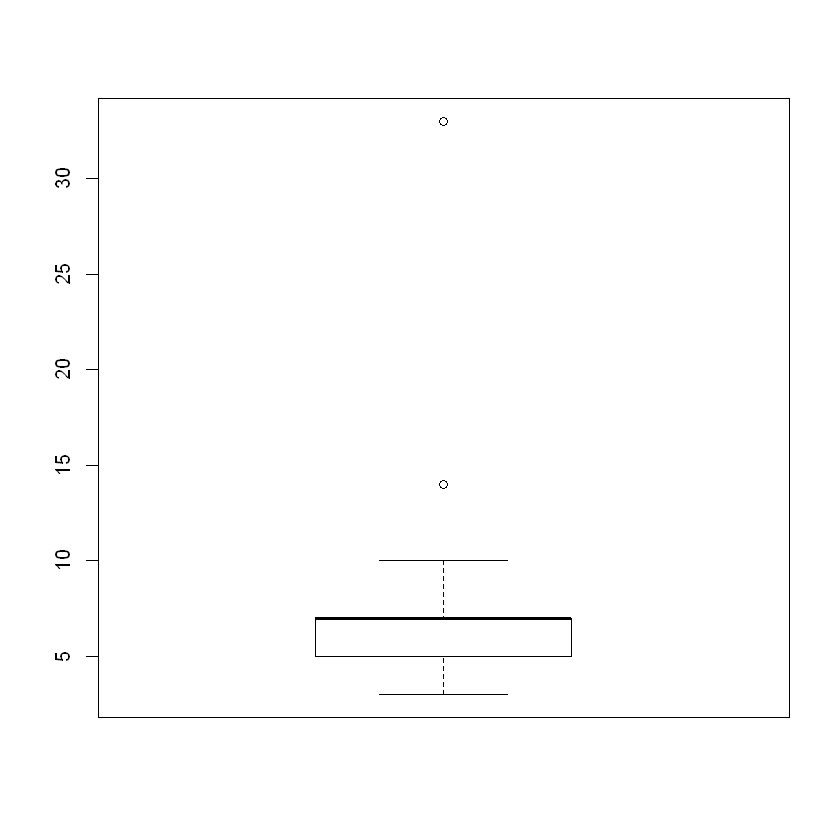

In [218]:
boxplot(human$Career)$stats

## 4. Career 변수값의 이상치 찾기

In [222]:
human$Career <- ifelse(human$Career >= 3 & human$Career <=10, human$Career, NA)
table(human$Career)


 4  5  6  7  8  9 
11  9  9 20 11  3 

In [224]:
human %>% 
    summarise(mean_Career = mean(Career, na.rm=T))

mean_Career
6.32
